In [ ]:
import pandas as pd 
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("city_day.csv")
print(Counter(data['City']))
data_delhi=data.loc[data['City']=='Delhi']
# data_lucknow=data.loc[data['City']=='Lucknow']

Counter({'Ahmedabad': 2009, 'Bengaluru': 2009, 'Chennai': 2009, 'Delhi': 2009, 'Lucknow': 2009, 'Mumbai': 2009, 'Hyderabad': 2006, 'Patna': 1858, 'Gurugram': 1679, 'Visakhapatnam': 1462, 'Amritsar': 1221, 'Jorapokhar': 1169, 'Jaipur': 1114, 'Thiruvananthapuram': 1112, 'Amaravati': 951, 'Brajrajnagar': 938, 'Talcher': 925, 'Kolkata': 814, 'Guwahati': 502, 'Coimbatore': 386, 'Shillong': 310, 'Chandigarh': 304, 'Bhopal': 289, 'Ernakulam': 162, 'Kochi': 162, 'Aizawl': 113})


In [ ]:
data_delhi

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


In [ ]:
data_delhi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 10229 to 12237
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2009 non-null   object 
 1   Date        2009 non-null   object 
 2   PM2.5       2007 non-null   float64
 3   PM10        1932 non-null   float64
 4   NO          2007 non-null   float64
 5   NO2         2007 non-null   float64
 6   NOx         2009 non-null   float64
 7   NH3         2000 non-null   float64
 8   CO          2009 non-null   float64
 9   SO2         1899 non-null   float64
 10  O3          1925 non-null   float64
 11  Benzene     2009 non-null   float64
 12  Toluene     2009 non-null   float64
 13  Xylene      1228 non-null   float64
 14  AQI         1999 non-null   float64
 15  AQI_Bucket  1999 non-null   object 
dtypes: float64(13), object(3)
memory usage: 266.8+ KB


#NO2

In [ ]:
data_delhi_NO2=data_delhi[['Date','NO2']]
data_delhi_NO2["Date"] = pd.to_datetime(data_delhi_NO2["Date"], format="%Y-%m-%d", errors="coerce")
assert data_delhi_NO2["Date"].dtype == "datetime64[ns]"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_delhi_NO2.set_index("Date", inplace=True)

In [ ]:
data_delhi_NO2

,NO2
Date,
2015-01-01,36.39
2015-01-02,32.87
2015-01-03,30.31
2015-01-04,36.91
2015-01-05,34.92
...,...
2020-06-27,21.46
2020-06-28,21.60
2020-06-29,21.57


In [ ]:
data_delhi_NO2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NO2     2007 non-null   float64
dtypes: float64(1)
memory usage: 31.4 KB


In [ ]:
def compare_dists(original_dist, imputed_dists: dict):
    """
    Plot original_dist and imputed_dists on top of each other
    to see the difference in distributions.
    """
    fig, ax = plt.subplots(figsize=(12, 7), dpi=140)
    # Plot the original
    sns.kdeplot(
        original_dist, linewidth=5, ax=ax, color="black", label="Original dist."
    )
    for key, value in imputed_dists.items():
        sns.kdeplot(value, linewidth=3, label=key, ax=ax)

    plt.legend()
    plt.show();

In [ ]:
# Choose 200 random
random_indices = np.random.choice([_ for _ in range(len(data_delhi_NO2))], size=200)
clone = data_delhi_NO2.copy(deep=True)
# Mark the indices as missing
clone.iloc[random_indices, 0] = np.nan

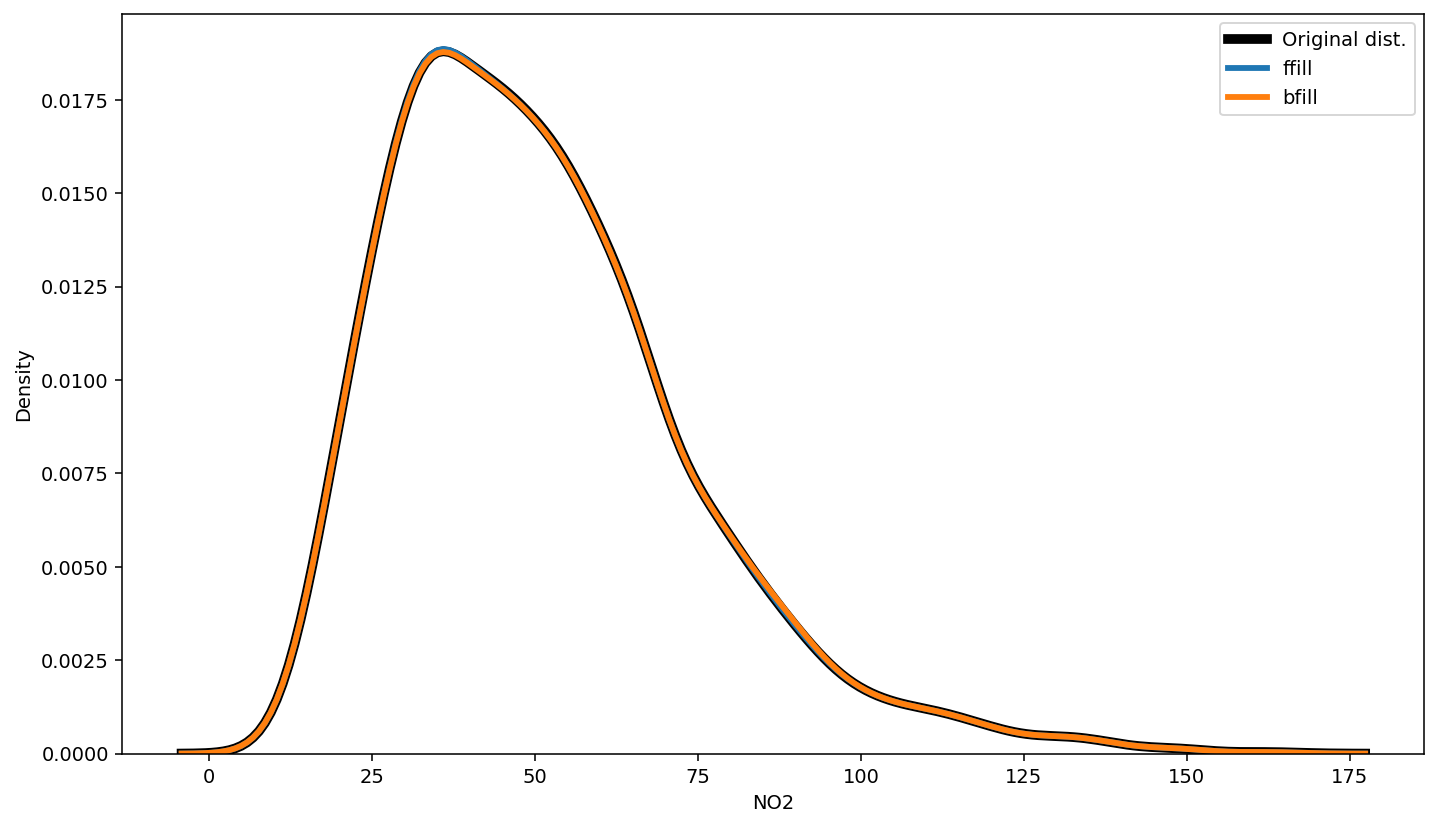

In [ ]:
clone2 = data_delhi_NO2.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['NO2'].{method}()")

compare_dists(data_delhi_NO2["NO2"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi_NO2['NO2']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_delhi_NO2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NO2     2009 non-null   float64
dtypes: float64(1)
memory usage: 31.4 KB


##Shifting

In [ ]:
data_delhi_NO2["shifted_1"] = data_delhi_NO2["NO2"].shift(periods=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_delhi_NO2["diff_lag"] = data_delhi_NO2["NO2"] - data_delhi_NO2["shifted_1"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


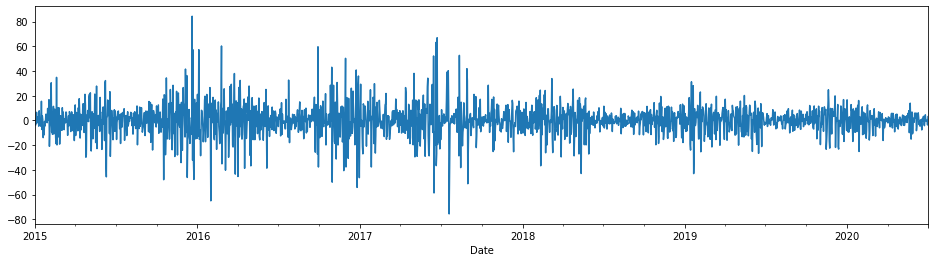

In [ ]:
data_delhi_NO2["diff_lag"].plot(figsize=(16, 4)); 

In [ ]:
data_month=data_delhi_NO2.resample("M").mean()

In [ ]:
data_month

,NO2,shifted_1,diff_lag
Date,,,
2015-01-31,36.925484,36.777667,0.165667
2015-02-28,41.656786,42.396429,-0.739643
2015-03-31,24.386129,24.402903,-0.016774
2015-04-30,44.279667,43.487333,0.792333
2015-05-31,61.483548,61.549355,-0.065806
...,...,...,...
2020-03-31,33.779355,34.293871,-0.514516
2020-04-30,21.008333,21.022333,-0.014000
2020-05-31,24.903871,24.921935,-0.018065


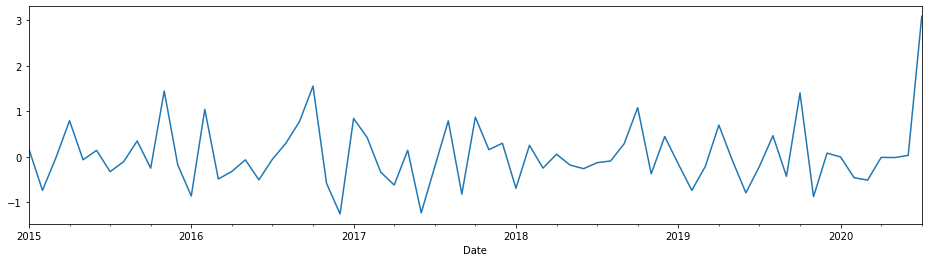

In [ ]:
data_month["diff_lag"].plot(figsize=(16, 4), label="");

In [ ]:
data_quarter=data_delhi_NO2.resample("Q").mean()

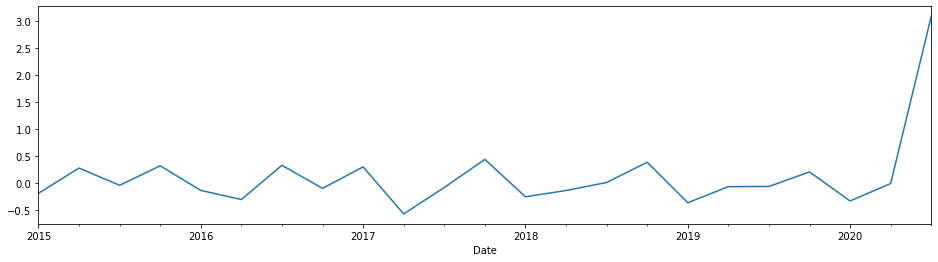

In [ ]:
data_quarter["diff_lag"].plot(figsize=(16, 4));

In [ ]:
data_week=data_delhi_NO2.resample("7D").mean()

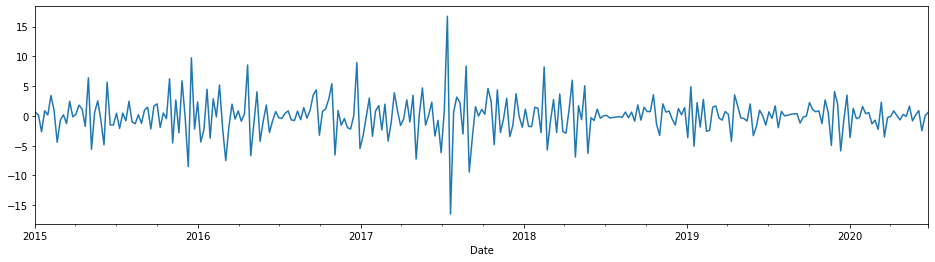

In [ ]:
data_week["diff_lag"].plot(figsize=(16, 4));

In [ ]:
data1=data_delhi_NO2["NO2"].resample("M").agg(["mean", "median", "std"])

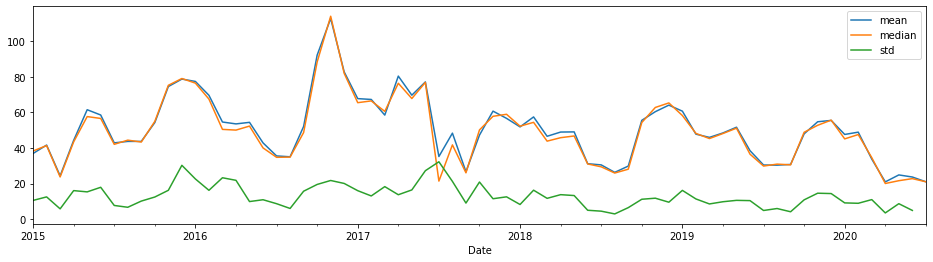

In [ ]:
data1.plot(figsize=(16, 4));

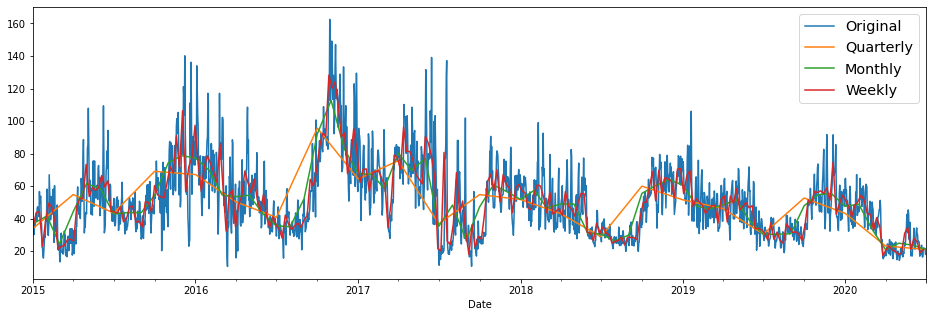

In [ ]:
data_delhi_NO2["NO2"].plot(figsize=(16, 5), label="Original")
data_quarter["NO2"].plot(label="Quarterly")
data_month["NO2"].plot(label="Monthly")
data_week["NO2"].plot(label="Weekly")
plt.legend(fontsize="x-large");

##Level Plots

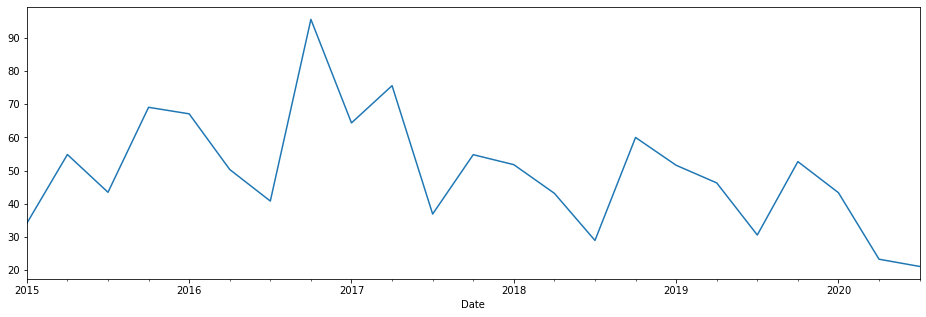

In [ ]:
data_quarter["NO2"].plot(figsize=(16, 5), label="Quarterly")


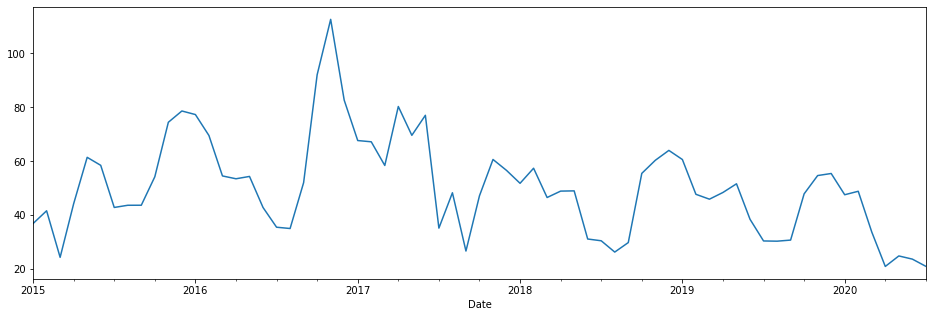

In [ ]:
data_month["NO2"].plot(figsize=(16, 5), label="Monthly")


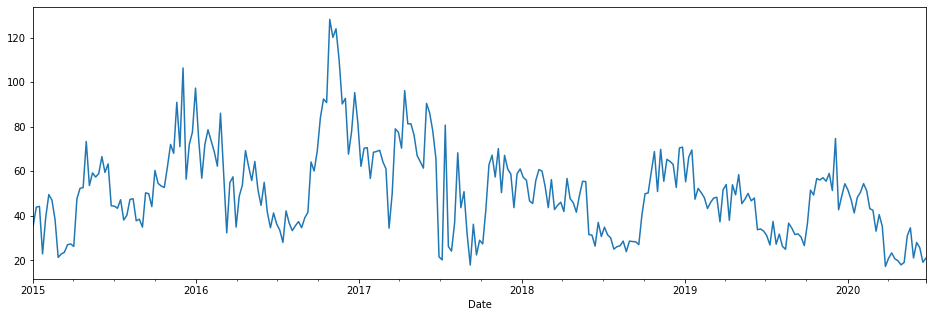

In [ ]:
data_week["NO2"].plot(figsize=(16, 5), label="Weekly")


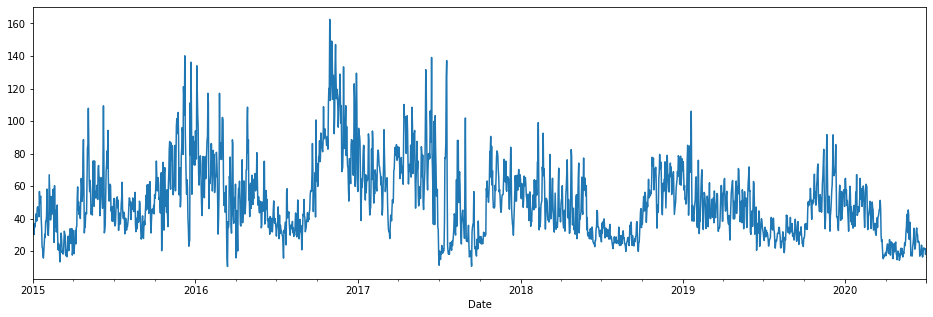

In [ ]:
data_delhi_NO2["NO2"].plot(figsize=(16, 5), label="Original")


##Seasonality

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


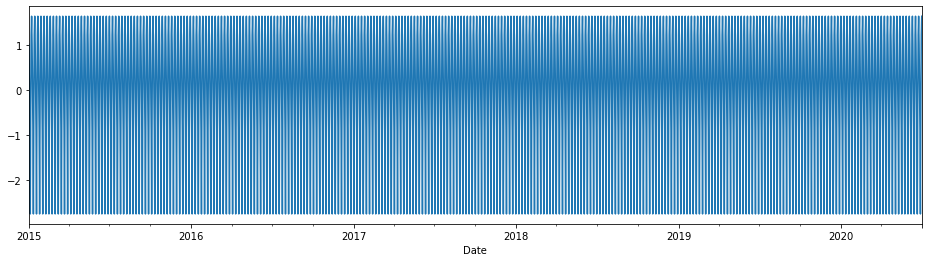

In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams

decomposition = sm.tsa.seasonal_decompose(data_delhi_NO2["NO2"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

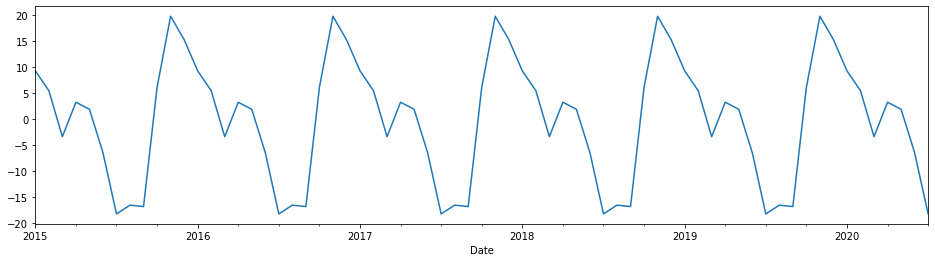

In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams

decomposition = sm.tsa.seasonal_decompose(data_month["NO2"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

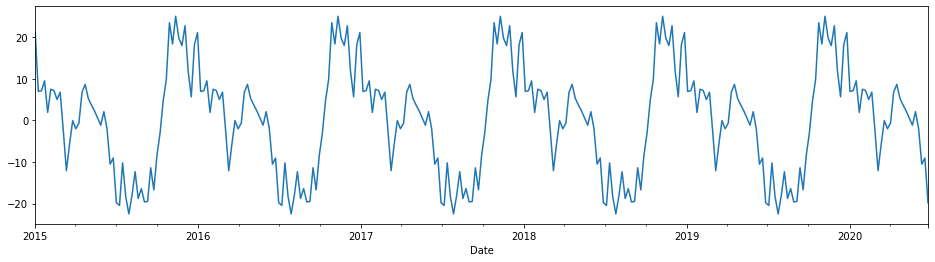

In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams

decomposition = sm.tsa.seasonal_decompose(data_week["NO2"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

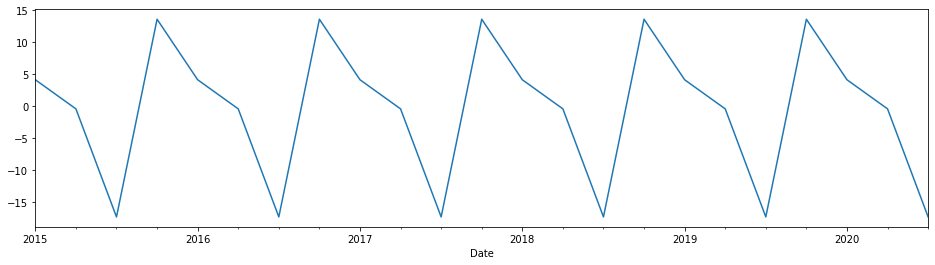

In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams

decomposition = sm.tsa.seasonal_decompose(data_quarter["NO2"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

##Trends

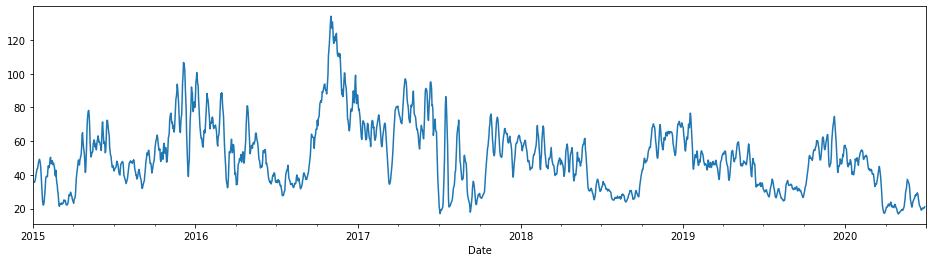

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data_delhi_NO2["NO2"].dropna())

decomposition.trend.plot();

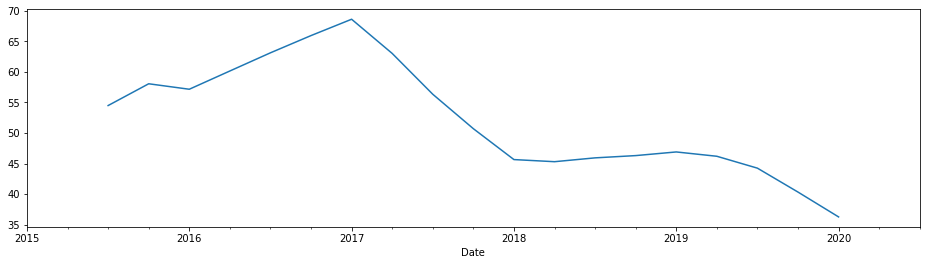

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data_quarter["NO2"].dropna())

decomposition.trend.plot();

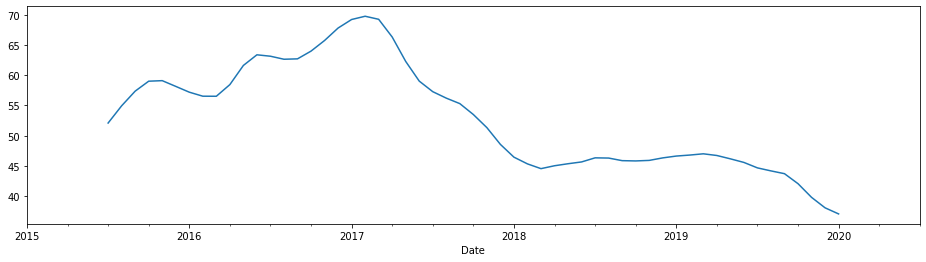

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data_month["NO2"].dropna())

decomposition.trend.plot();

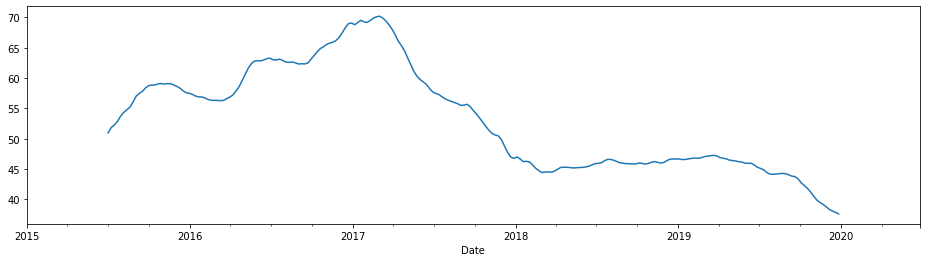

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data_week["NO2"].dropna())

decomposition.trend.plot();

##Autocorrelation

In [ ]:
data_delhi_NO2["NO2"].diff(1).dropna()

Date
2015-01-02   -3.52
2015-01-03   -2.56
2015-01-04    6.60
2015-01-05   -1.99
2015-01-06    2.92
              ... 
2020-06-27   -0.60
2020-06-28    0.14
2020-06-29   -0.03
2020-06-30   -3.61
2020-07-01    3.09
Name: NO2, Length: 2008, dtype: float64

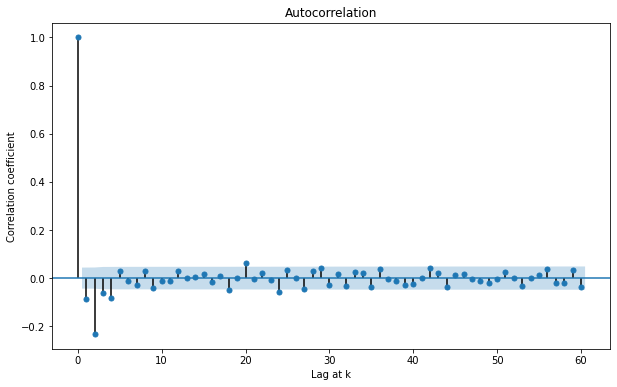

In [ ]:
from statsmodels.graphics import tsaplots

rcParams["figure.figsize"] = 10, 6

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(data_delhi_NO2["NO2"].diff(1).dropna(), lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

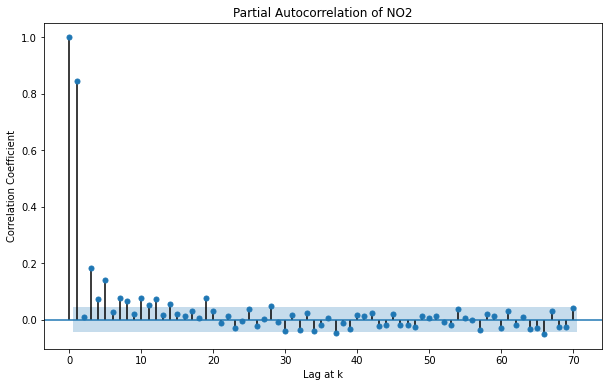

In [ ]:
fig = tsaplots.plot_pacf(data_delhi_NO2["NO2"], lags=70)

plt.title("Partial Autocorrelation of NO2")
plt.xlabel("Lag at k")
plt.ylabel("Correlation Coefficient")
plt.show();

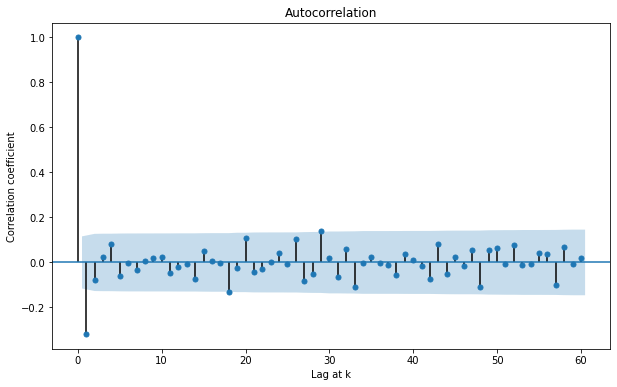

In [ ]:
from statsmodels.graphics import tsaplots

rcParams["figure.figsize"] = 10, 6

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(data_week["NO2"].diff(1).dropna(), lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

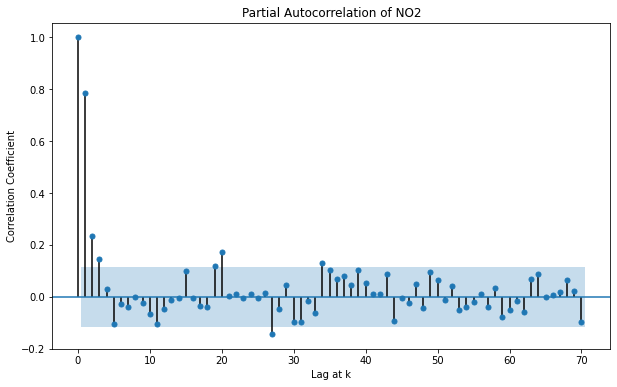

In [ ]:
fig = tsaplots.plot_pacf(data_week["NO2"], lags=70)

plt.title("Partial Autocorrelation of NO2")
plt.xlabel("Lag at k")
plt.ylabel("Correlation Coefficient")
plt.show();

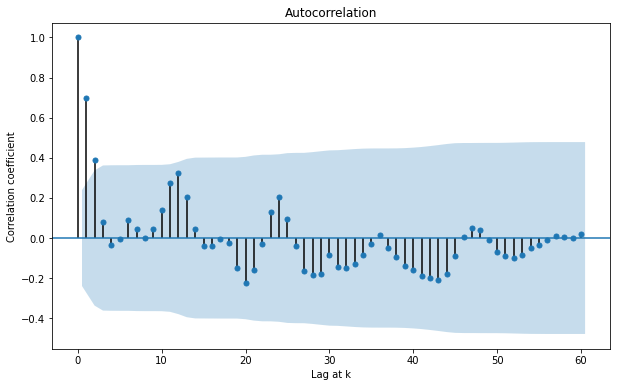

In [ ]:
from statsmodels.graphics import tsaplots

rcParams["figure.figsize"] = 10, 6

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(data_month["NO2"], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

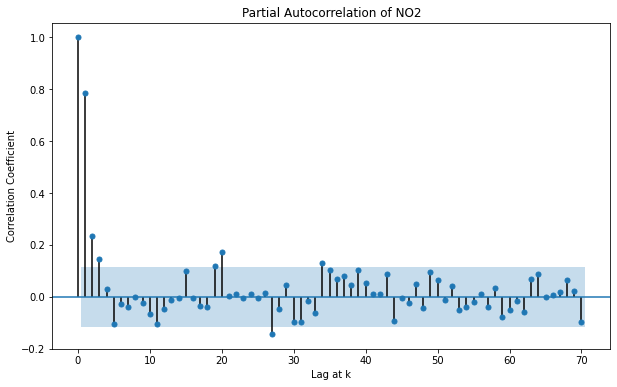

In [ ]:
fig = tsaplots.plot_pacf(data_week["NO2"], lags=70)

plt.title("Partial Autocorrelation of NO2")
plt.xlabel("Lag at k")
plt.ylabel("Correlation Coefficient")
plt.show();

#SO2

In [ ]:
data_delhi_SO2=data_delhi[['Date','SO2']]
data_delhi_SO2["Date"] = pd.to_datetime(data_delhi_SO2["Date"], format="%Y-%m-%d", errors="coerce")
assert data_delhi_SO2["Date"].dtype == "datetime64[ns]"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_delhi_SO2.set_index("Date", inplace=True)

In [ ]:
# Choose 200 random
random_indices = np.random.choice([_ for _ in range(len(data_delhi_SO2))], size=200)
clone = data_delhi_SO2.copy(deep=True)
# Mark the indices as missing
clone.iloc[random_indices, 0] = np.nan

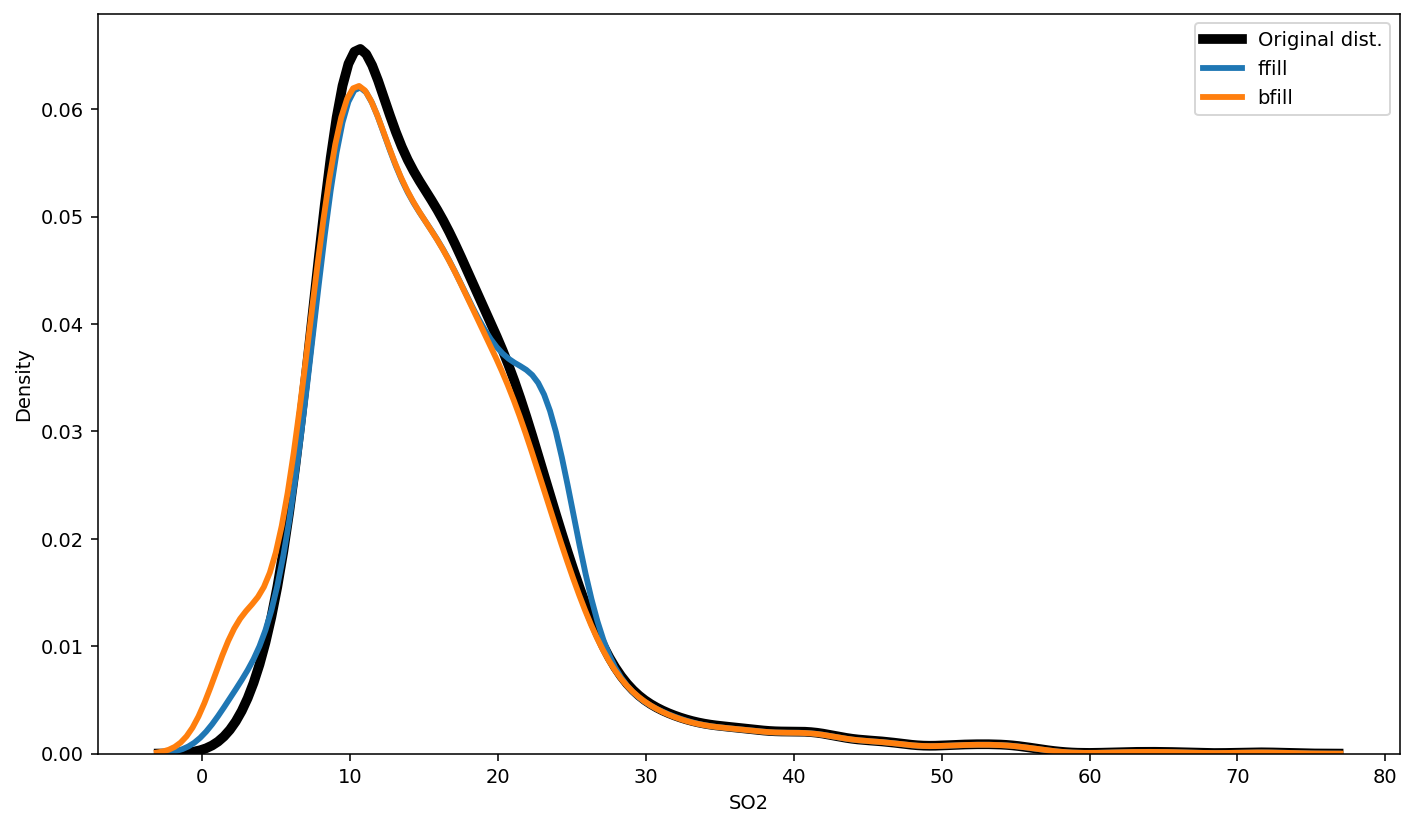

In [ ]:
clone2 = data_delhi_SO2.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['SO2'].{method}()")

compare_dists(data_delhi_SO2["SO2"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi_SO2['SO2']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_delhi_SO2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SO2     2009 non-null   float64
dtypes: float64(1)
memory usage: 31.4 KB


In [ ]:
data_delhi_SO2["shifted_1"] = data_delhi_SO2["SO2"].shift(periods=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_delhi_SO2["diff_lag"] = data_delhi_SO2["SO2"] - data_delhi_SO2["shifted_1"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


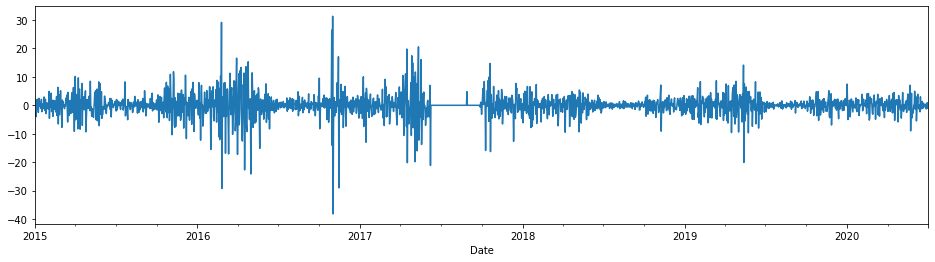

In [ ]:
data_delhi_SO2["diff_lag"].plot(figsize=(16, 4));

In [ ]:
data_month_SO2=data_delhi_SO2.resample("M").mean()

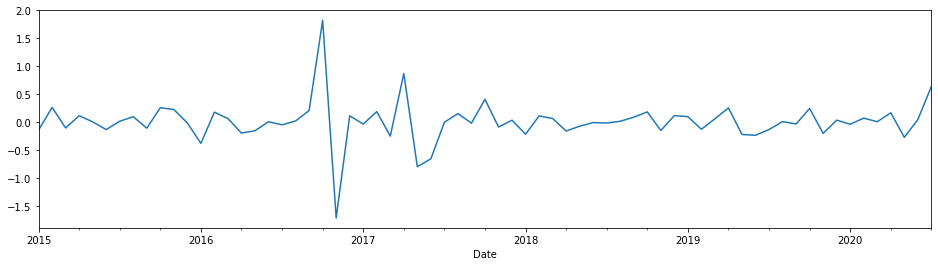

In [ ]:
data_month_SO2["diff_lag"].plot(figsize=(16, 4));

In [ ]:
data_week_SO2=data_delhi_SO2.resample("7D").mean()

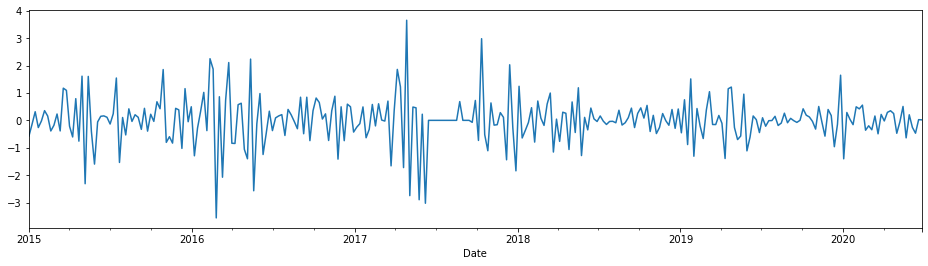

In [ ]:
data_week_SO2["diff_lag"].plot(figsize=(16, 4));

In [ ]:
data_quarter_SO2=data_delhi_SO2.resample("Q").mean()

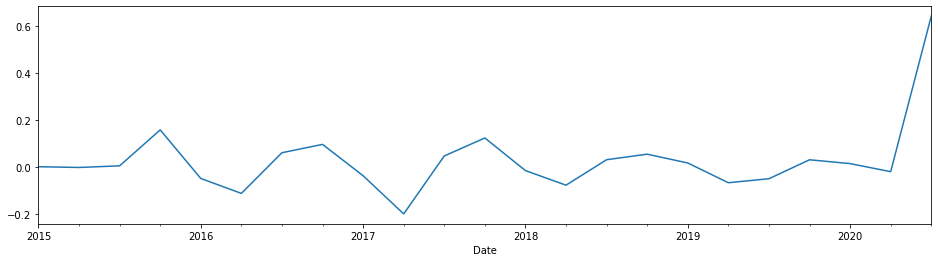

In [ ]:
data_quarter_SO2["diff_lag"].plot(figsize=(16, 4));

In [ ]:
data1=data_delhi_SO2["SO2"].resample("M").agg(["mean", "median", "std"])

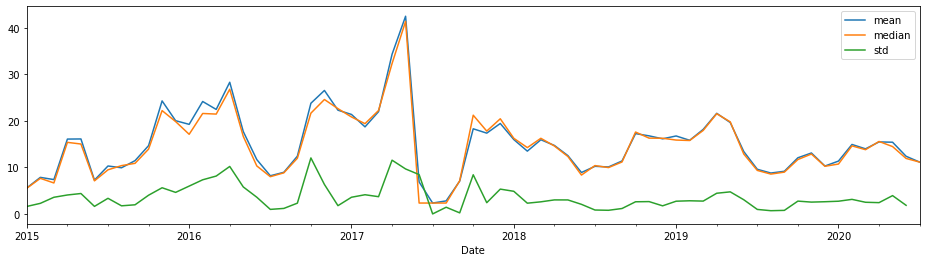

In [ ]:
data1.plot(figsize=(16, 4));

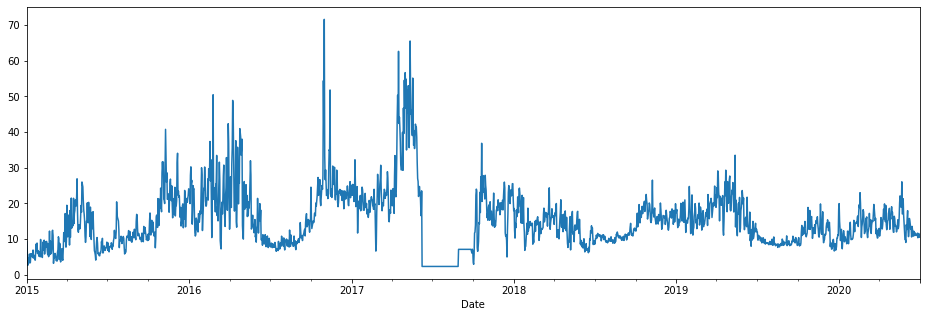

In [ ]:
data_delhi_SO2["SO2"].plot(figsize=(16, 5), label="Original")

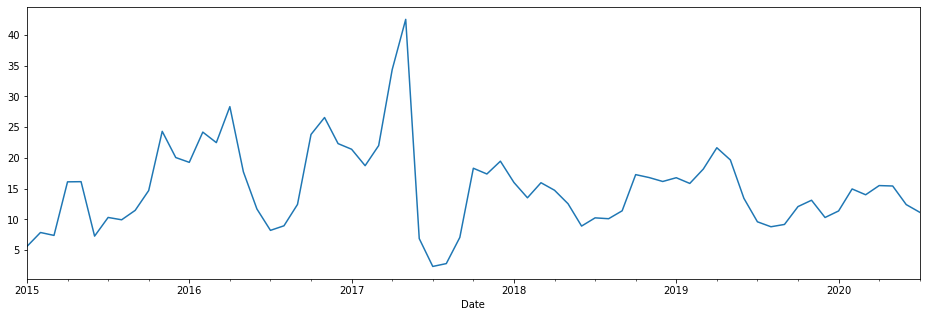

In [ ]:
data_month_SO2["SO2"].plot(figsize=(16, 5), label="Monthly")

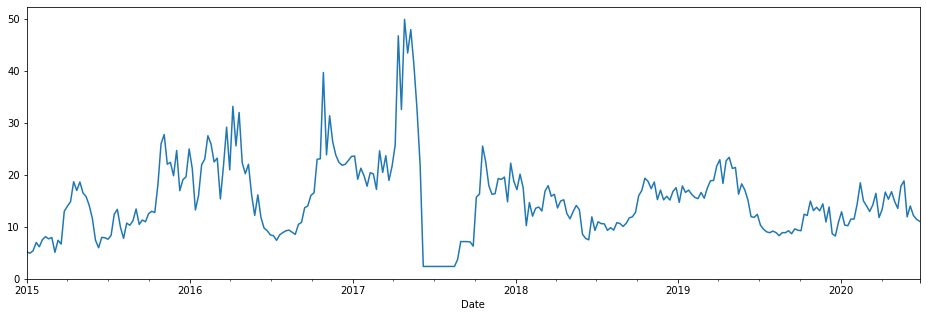

In [ ]:
data_week_SO2["SO2"].plot(figsize=(16, 5), label="Weekly")

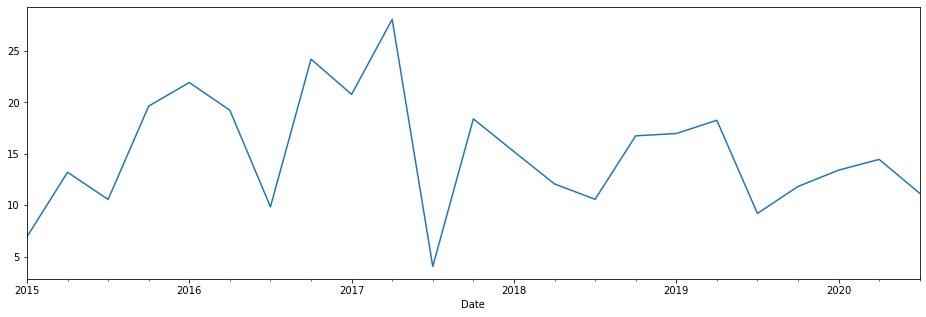

In [ ]:
data_quarter_SO2["SO2"].plot(figsize=(16, 5), label="Quarterly")

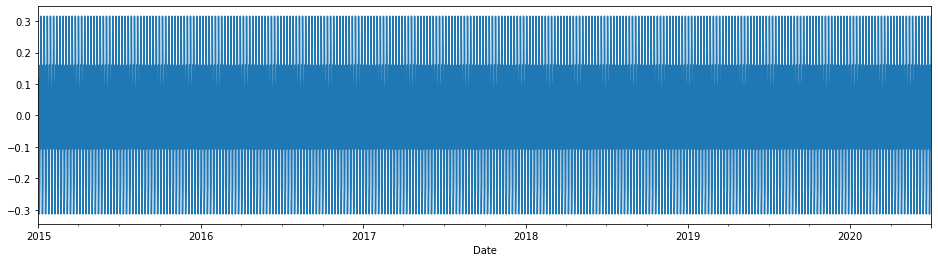

In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams

decomposition = sm.tsa.seasonal_decompose(data_delhi_SO2["SO2"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

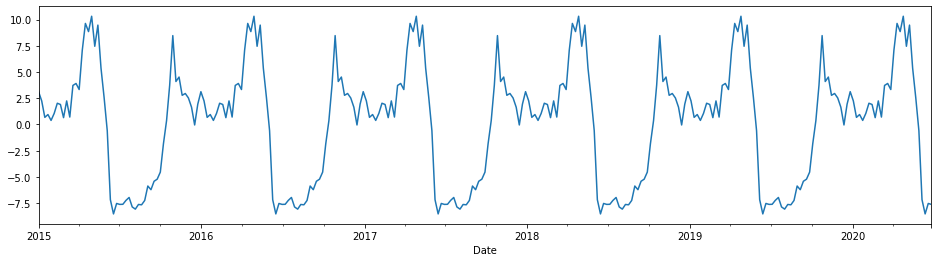

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data_week_SO2["SO2"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

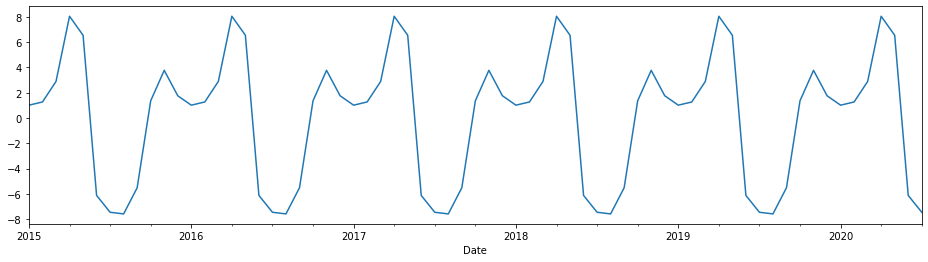

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data_month_SO2["SO2"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

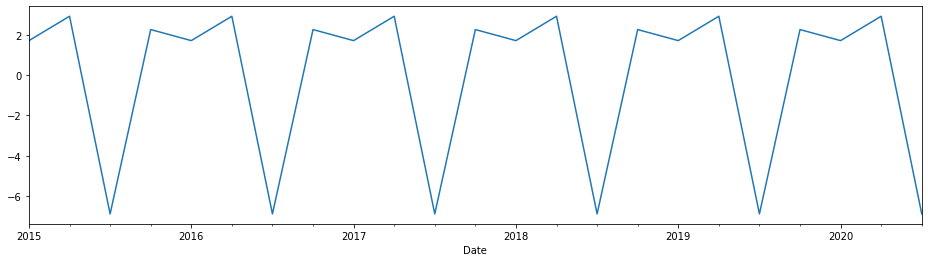

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data_quarter_SO2["SO2"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

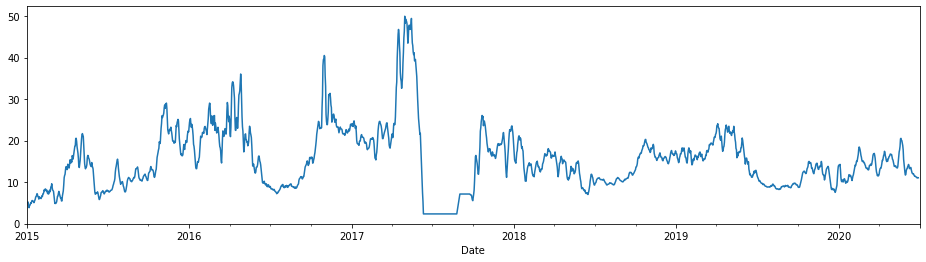

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data_delhi_SO2["SO2"])

rcParams["figure.figsize"] = 16, 4
decomposition.trend.plot();

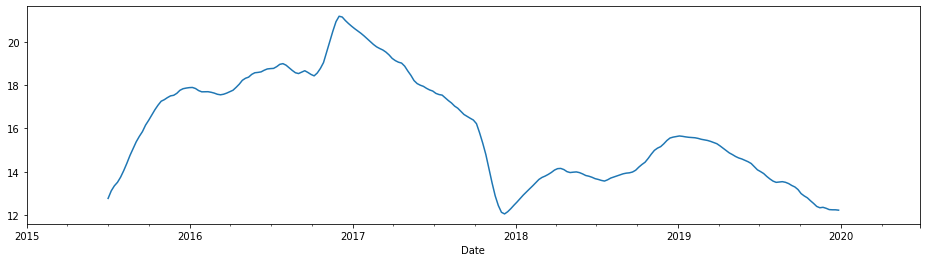

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data_week_SO2["SO2"])

rcParams["figure.figsize"] = 16, 4
decomposition.trend.plot();

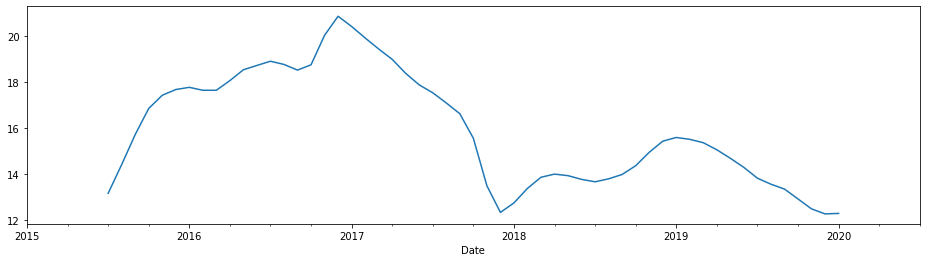

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data_month_SO2["SO2"])

rcParams["figure.figsize"] = 16, 4
decomposition.trend.plot();

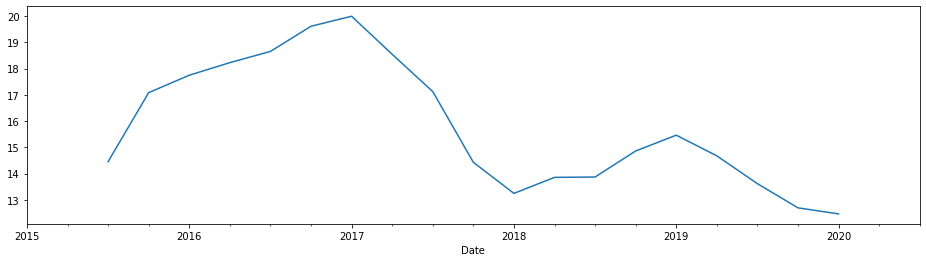

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data_quarter_SO2["SO2"])

rcParams["figure.figsize"] = 16, 4
decomposition.trend.plot();

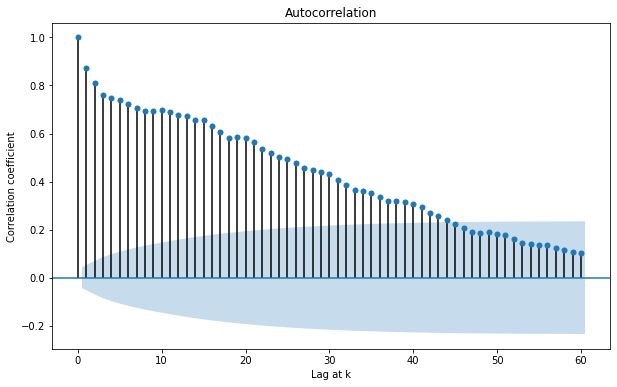

In [ ]:
from statsmodels.graphics import tsaplots

rcParams["figure.figsize"] = 10, 6

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(data_delhi_SO2["SO2"], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

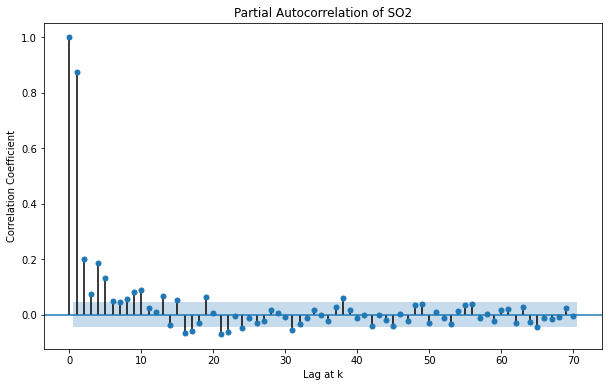

In [ ]:
fig = tsaplots.plot_pacf(data_delhi_SO2["SO2"], lags=70)

plt.title("Partial Autocorrelation of SO2")
plt.xlabel("Lag at k")
plt.ylabel("Correlation Coefficient")
plt.show();

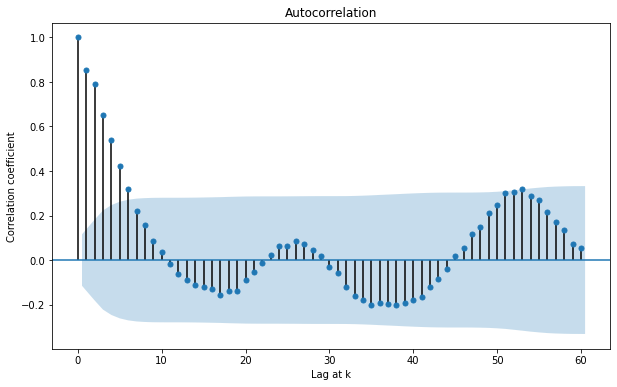

In [ ]:
from statsmodels.graphics import tsaplots

rcParams["figure.figsize"] = 10, 6

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(data_week_SO2["SO2"], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

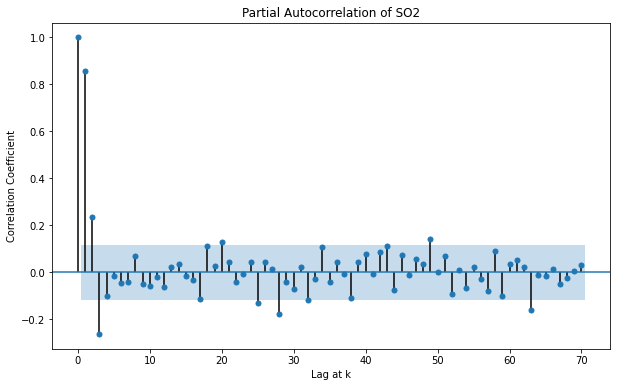

In [ ]:
fig = tsaplots.plot_pacf(data_week_SO2["SO2"], lags=70)

plt.title("Partial Autocorrelation of SO2")
plt.xlabel("Lag at k")
plt.ylabel("Correlation Coefficient")
plt.show();

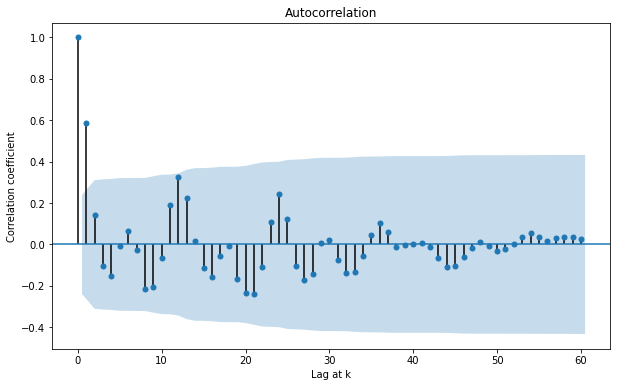

In [ ]:
rcParams["figure.figsize"] = 10, 6

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(data_month_SO2["SO2"], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1350: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


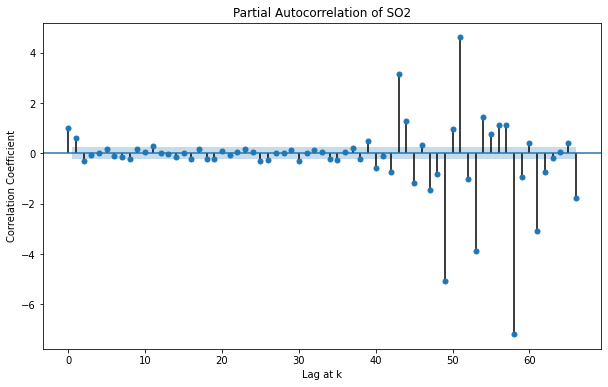

In [ ]:
fig = tsaplots.plot_pacf(data_month_SO2["SO2"], lags=70)

plt.title("Partial Autocorrelation of SO2")
plt.xlabel("Lag at k")
plt.ylabel("Correlation Coefficient")
plt.show();

#AQI

In [ ]:
data_delhi_aqi=data_delhi[['Date','AQI']]
data_delhi_aqi["Date"] = pd.to_datetime(data_delhi_aqi["Date"], format="%Y-%m-%d", errors="coerce")
assert data_delhi_aqi["Date"].dtype == "datetime64[ns]"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_delhi_aqi.set_index("Date", inplace=True)

In [ ]:
# Choose 200 random
random_indices = np.random.choice([_ for _ in range(len(data_delhi_aqi))], size=200)
clone = data_delhi_aqi.copy(deep=True)
# Mark the indices as missing
clone.iloc[random_indices, 0] = np.nan

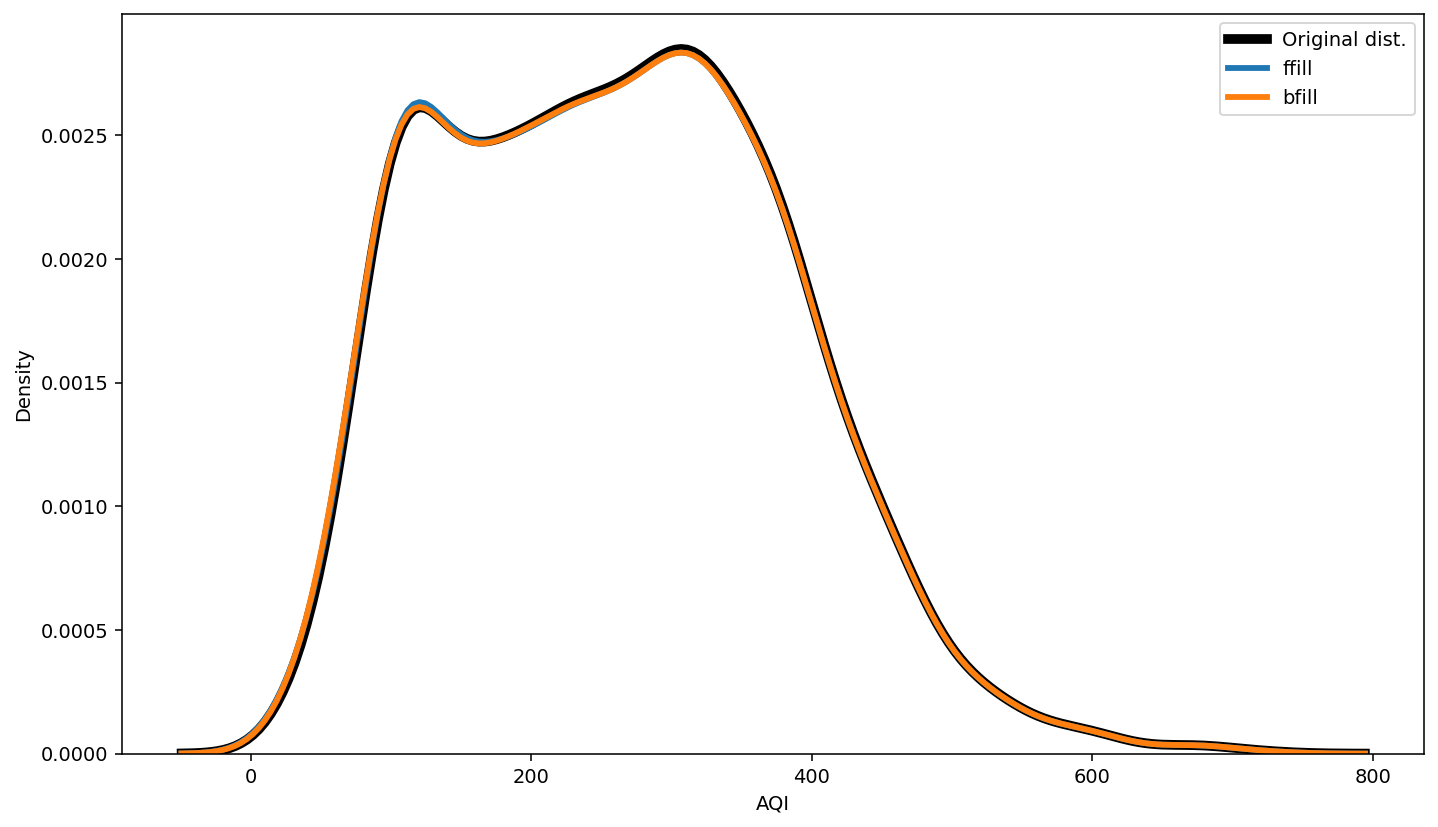

In [ ]:
clone2 = data_delhi_aqi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['AQI'].{method}()")

compare_dists(data_delhi_aqi["AQI"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi_aqi['AQI']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_delhi_aqi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AQI     2009 non-null   float64
dtypes: float64(1)
memory usage: 31.4 KB


In [ ]:
data_delhi_aqi["shifted_1"] = data_delhi_aqi["AQI"].shift(periods=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_delhi_aqi["diff_lag"] = data_delhi_aqi["AQI"] - data_delhi_aqi["shifted_1"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


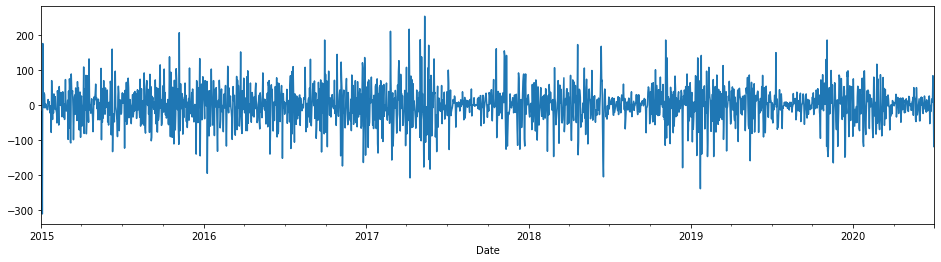

In [ ]:
data_delhi_aqi["diff_lag"].plot(figsize=(16, 4));

In [ ]:
data_month_aqi=data_delhi_aqi.resample("M").mean()

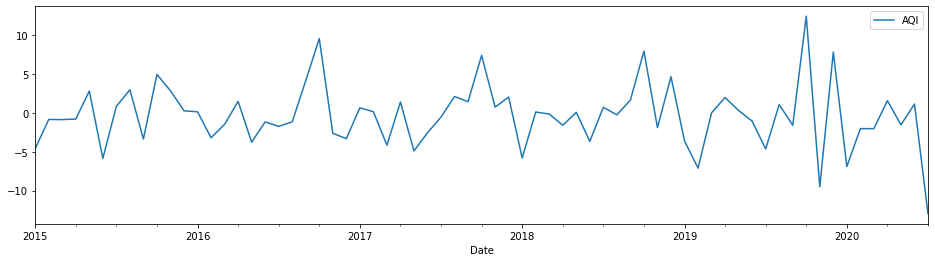

In [ ]:
data_month_aqi["diff_lag"].plot(figsize=(16, 4), label="AQI");
plt.legend()
plt.savefig(fname="diff_lag.jpg", dpi=600)

In [ ]:
data_week_aqi=data_delhi_aqi.resample("7D").mean()

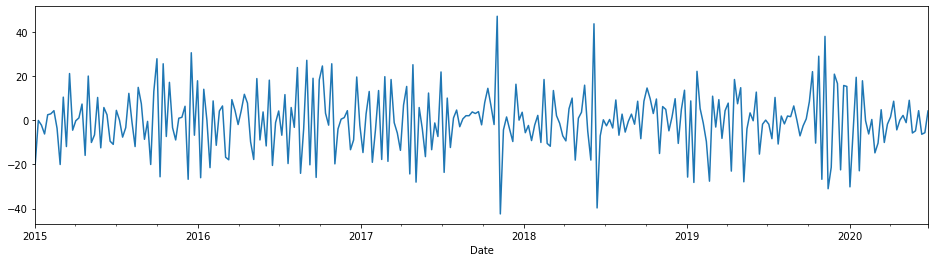

In [ ]:
data_week_aqi["diff_lag"].plot(figsize=(16, 4));

In [ ]:
data_quarter_aqi=data_delhi_aqi.resample("Q").mean()

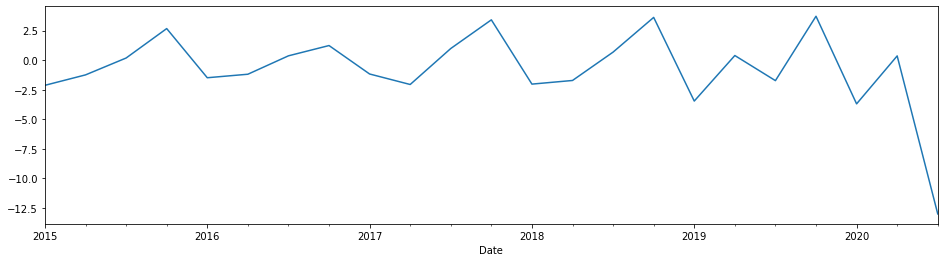

In [ ]:
data_quarter_aqi["diff_lag"].plot(figsize=(16, 4));

In [ ]:
data1=data_delhi_aqi["AQI"].resample("M").agg(["mean", "median", "std"])

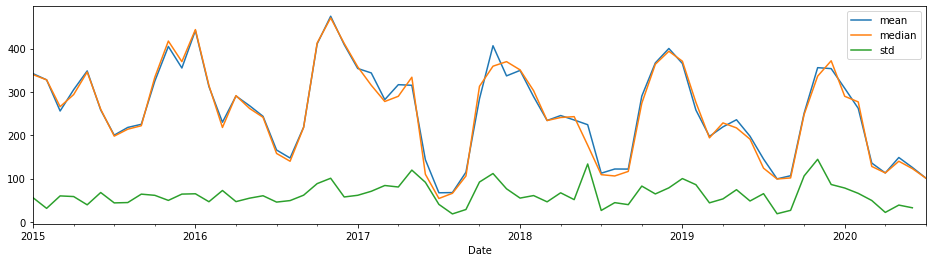

In [ ]:
data1.plot(figsize=(16, 4));

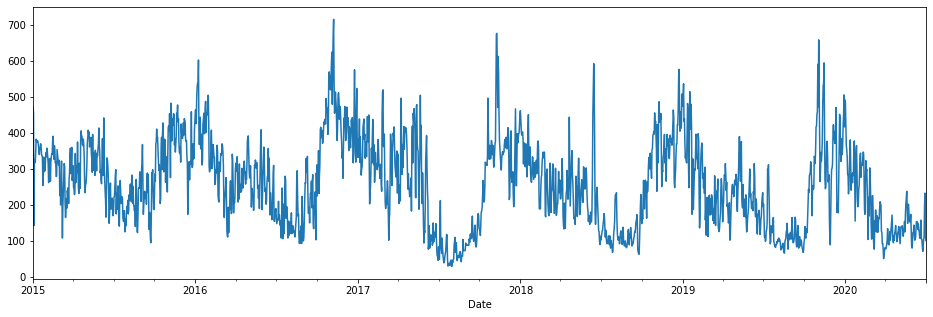

In [ ]:
data_delhi_aqi["AQI"].plot(figsize=(16, 5), label="Original")

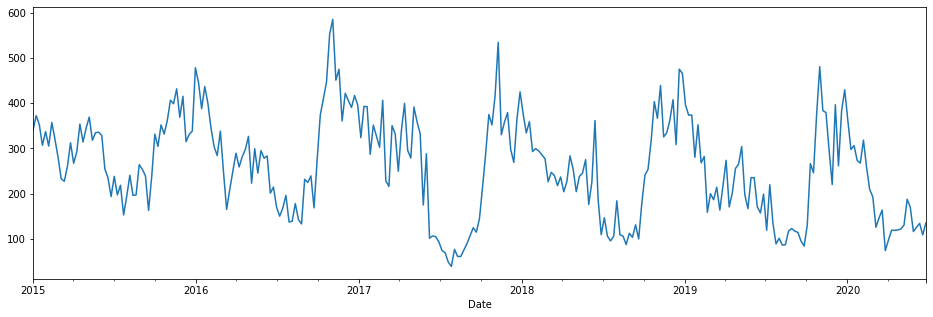

In [ ]:
data_week_aqi["AQI"].plot(figsize=(16, 5), label="Weekly")

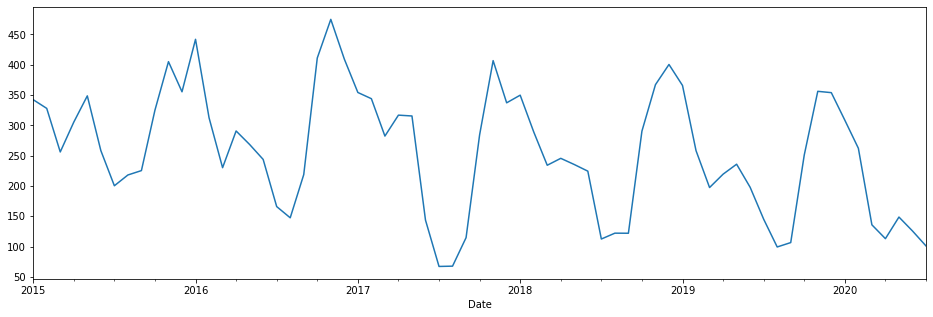

In [ ]:
data_month_aqi["AQI"].plot(figsize=(16, 5), label="Monthly")

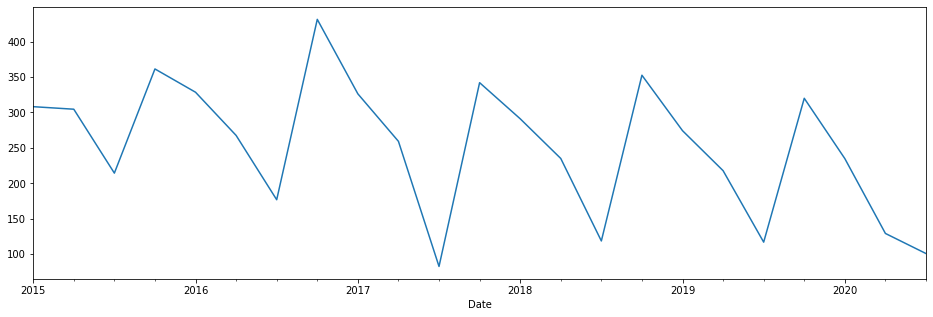

In [ ]:
data_quarter_aqi["AQI"].plot(figsize=(16, 5), label="Quarterly")

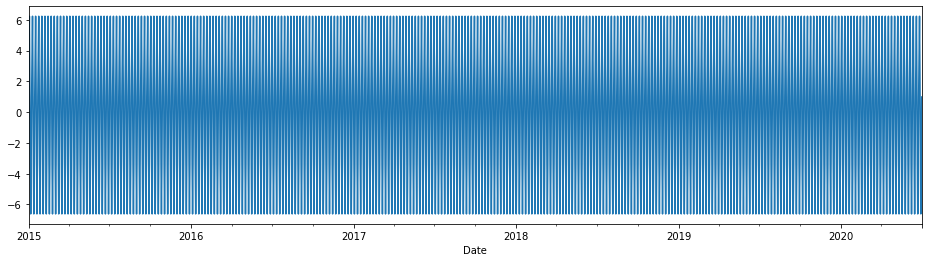

In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams

decomposition = sm.tsa.seasonal_decompose(data_delhi_aqi["AQI"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

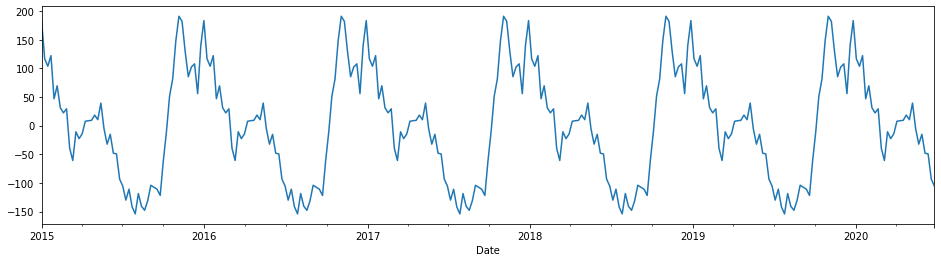

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data_week_aqi["AQI"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

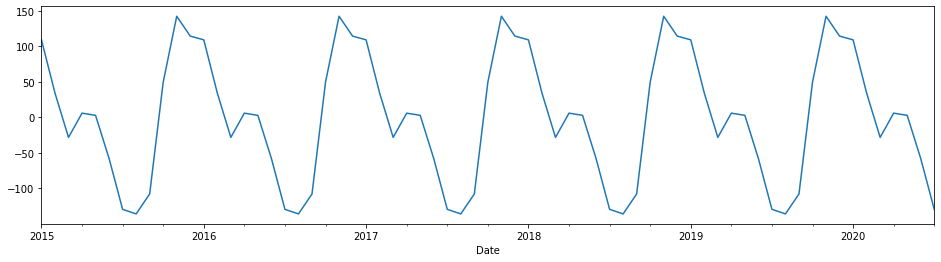

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data_month_aqi["AQI"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

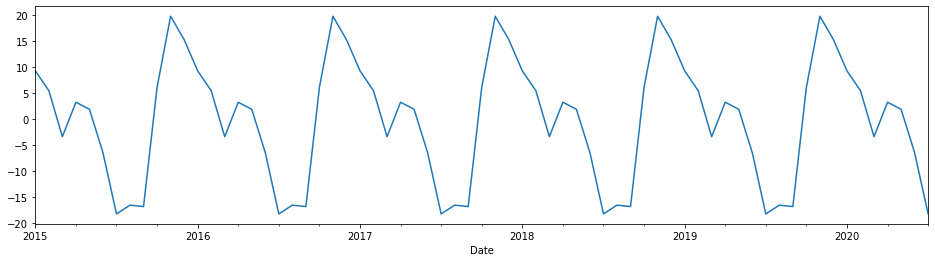

In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams

decomposition = sm.tsa.seasonal_decompose(data_month["NO2"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

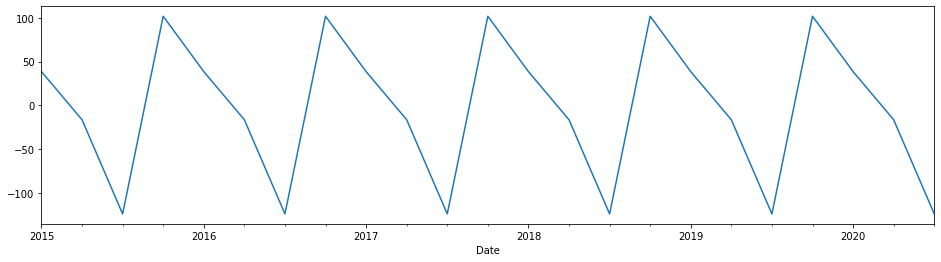

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data_quarter_aqi["AQI"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

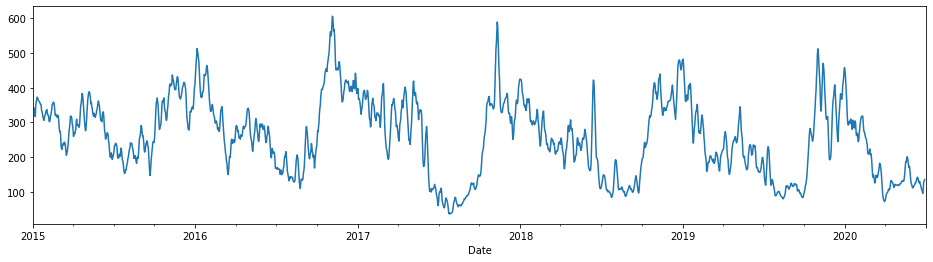

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data_delhi_aqi["AQI"])

rcParams["figure.figsize"] = 16, 4
decomposition.trend.plot();

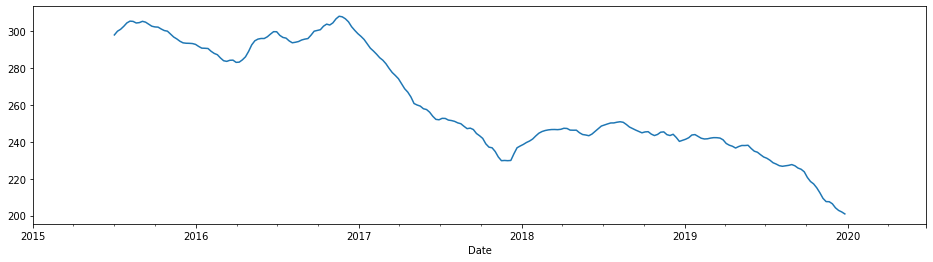

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data_week_aqi["AQI"])

rcParams["figure.figsize"] = 16, 4
decomposition.trend.plot();

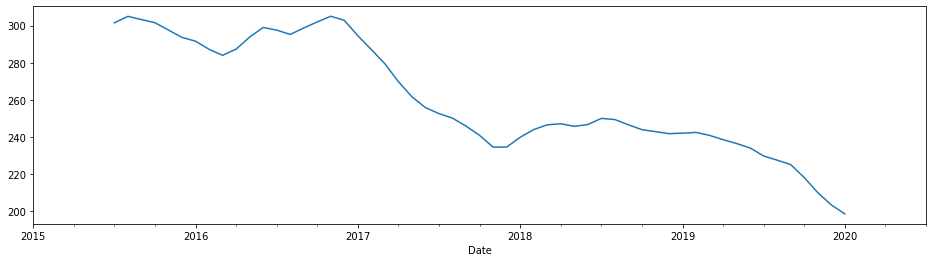

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data_month_aqi["AQI"])

rcParams["figure.figsize"] = 16, 4
decomposition.trend.plot();

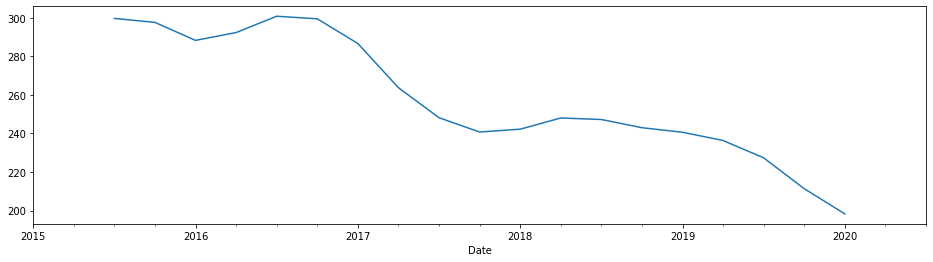

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data_quarter_aqi["AQI"])

rcParams["figure.figsize"] = 16, 4
decomposition.trend.plot();

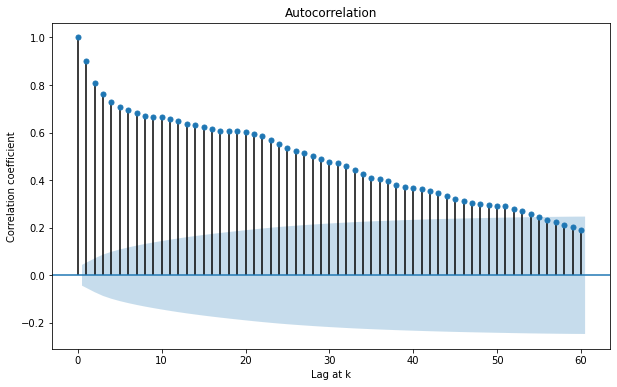

In [ ]:
from statsmodels.graphics import tsaplots

rcParams["figure.figsize"] = 10, 6

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(data_delhi_aqi["AQI"], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

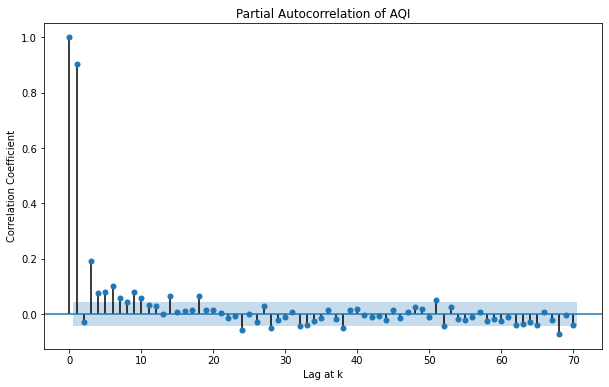

In [ ]:
fig = tsaplots.plot_pacf(data_delhi_aqi["AQI"], lags=70)

plt.title("Partial Autocorrelation of AQI")
plt.xlabel("Lag at k")
plt.ylabel("Correlation Coefficient")
plt.show();

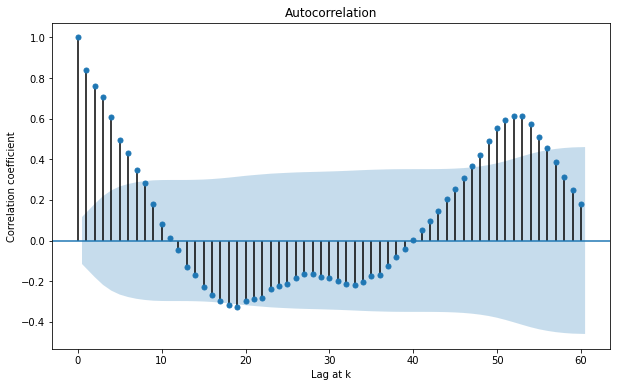

In [ ]:
rcParams["figure.figsize"] = 10, 6

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(data_week_aqi["AQI"], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

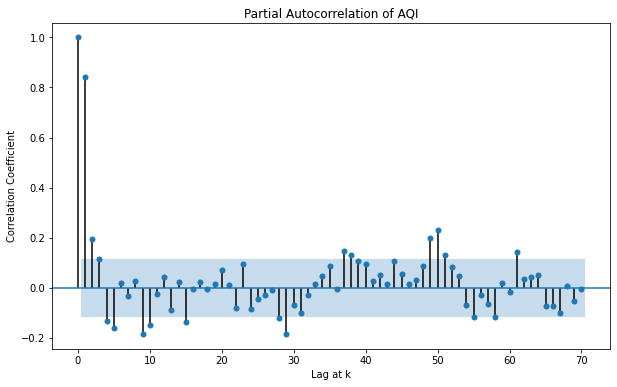

In [ ]:
fig = tsaplots.plot_pacf(data_week_aqi["AQI"], lags=70)

plt.title("Partial Autocorrelation of AQI")
plt.xlabel("Lag at k")
plt.ylabel("Correlation Coefficient")
plt.show();

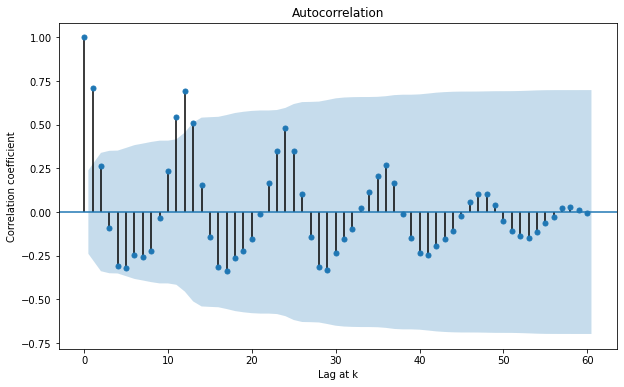

In [ ]:
rcParams["figure.figsize"] = 10, 6

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(data_month_aqi["AQI"], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1350: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


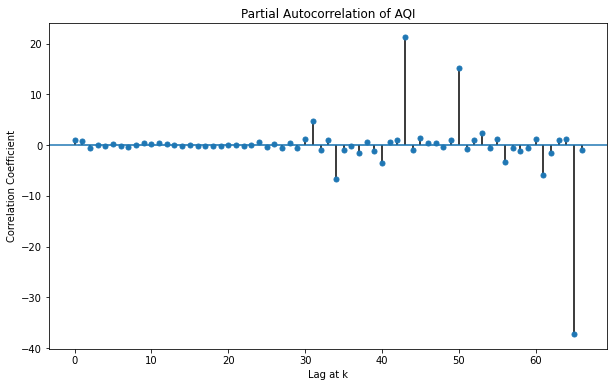

In [ ]:
fig = tsaplots.plot_pacf(data_month_aqi["AQI"], lags=70)

plt.title("Partial Autocorrelation of AQI")
plt.xlabel("Lag at k")
plt.ylabel("Correlation Coefficient")
plt.show();

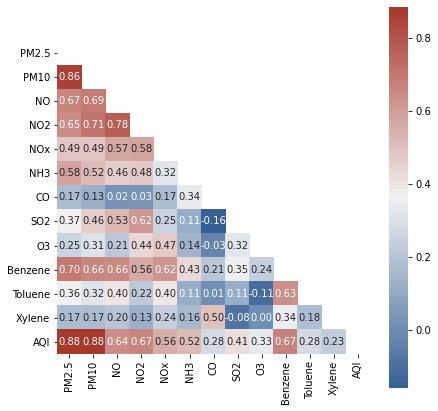

In [ ]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = data_delhi.corr(method="pearson")  #print AQI
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show();

In [ ]:
print(data_delhi_NO2["NO2"])

Date
2015-01-01    36.39
2015-01-02    32.87
2015-01-03    30.31
2015-01-04    36.91
2015-01-05    34.92
              ...  
2020-06-27    21.46
2020-06-28    21.60
2020-06-29    21.57
2020-06-30    17.96
2020-07-01    21.05
Name: NO2, Length: 2009, dtype: float64


In [ ]:
print(data_delhi_NO2["NO2"]["2015-01-01":"2015-01-15"])

Date
2015-01-01    36.39
2015-01-02    32.87
2015-01-03    30.31
2015-01-04    36.91
2015-01-05    34.92
2015-01-06    37.84
2015-01-07    40.15
2015-01-08    43.16
2015-01-09    38.56
2015-01-10    46.39
2015-01-11    47.29
2015-01-12    44.71
2015-01-13    45.88
2015-01-14    41.17
2015-01-15    56.70
Name: NO2, dtype: float64
